In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import os
import string
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp

In [3]:
df = pd.read_excel (r'Data/Q_data_9.xlsx')
print(df.shape)

(9, 130)


In [4]:
maze_data = []
dirhome = os.path.dirname(os.path.realpath('__file__'))
directory = os.path.join(dirhome, 'Data\Maze Log')
for filename in os.listdir(directory):
    if filename.endswith(".json"):
        print(filename)
        with open(os.path.join(directory, filename)) as json_file:
            data = json.load(json_file)
            maze_data.append(data)

05b85b0d-d3d9-4876-bc75-706b4e4d1cf3.VR_Maze.json
48f215f0-c6a4-4933-8d2c-f93ee8a31871.VR_Maze.json
7ad7b7bd-944d-446e-a376-66f6dca55aaf.VR_Maze.json
7f7b204e-1bf8-40fb-b299-99265bf9387c.VR_Maze.json
a5646206-e40b-43fc-ab35-8a1f6fde475b.VR_Maze.json
a8404373-e4dc-4fcb-8a67-4982d89635e8.VR_Maze.json
b3bb8a53-9379-4c8b-9bbe-c17997111ce9.VR_Maze.json
c5a26891-c64f-477b-ae5b-cb436685f07d.VR_Maze.json
fe5fde23-e6d4-44f5-a65d-8dffc032e526.VR_Maze.json


In [44]:
def col2num(col):
    num = 0
    for c in col:
        if c in string.ascii_letters:
            num = num * 26 + (ord(c.upper()) - ord('A')) + 1
    return num - 1

In [51]:
GENDER = col2num("K")
HAND = col2num("L")
HMD = col2num("P")
VR = col2num("M")
GAMES = col2num("N")
SSQs = [16]
ENDQNA = col2num("DJ")
SYMPTOMS = ["General Discomfort", "Fatigue", "Headache", "Eyestrain", "Difficulty Focusing", "Blurred Vision", "Dizziness", "Vertigo"]
oculSymptoms = ("General Discomfort", "Fatigue", "Eyestrain", "Difficulty Focusing")
disSymptoms = ("Headache", "Blurred Vision", "Dizziness", "Vertigo")
participantNum = df.shape[0]

In [52]:
print (df.iloc[:,ENDQNA])

0    2nd
1    2nd
2    1st
3    2nd
4    4th
5    4th
6    1st
7    1st
8    1st
Name: Teleportation, dtype: object


(9, 130)


In [7]:
# Count males and females
males = 0
females = 0

for g in df.iloc[:,GENDER]:
    if g == "Male":
        males += 1
    else:
        females += 1

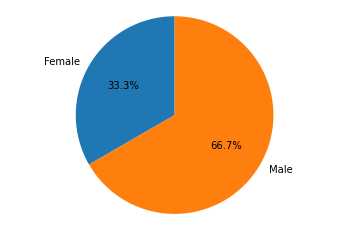

In [8]:
# Pie chart for gender
labels = ['Female', 'Male']
sizes = [females, males]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [9]:
# Count Quest 1s and 2s
q1 = 0
q2 = 0

for g in df.iloc[:,HMD]:
    if g == "Quest 1":
        q1 += 1
    else:
        q2 += 1

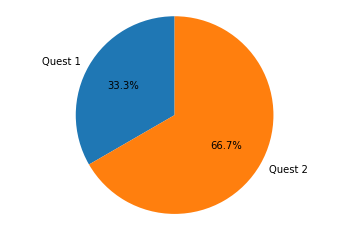

In [10]:
# Pie chart for gender
labels = ['Quest 1', 'Quest 2']
sizes = [q1, q2]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [11]:
# count how many times you have played vr before
VRcount = [0,0,0,0,0]
for g in df.iloc[:,VR]:
    if g == "Never":
        VRcount[0] += 1
    elif g == "1 - 3 times":
        VRcount[1] += 1
    elif g == "4 - 6 times":
        VRcount[2] += 1
    elif g == "7 - 9 times":
        VRcount[3] += 1
    elif g == "10 or more":
        VRcount[4] += 1

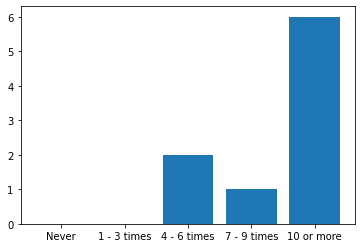

In [12]:
fig1, ax1 = plt.subplots()
time_frame = ['Never', '1 - 3 times', '4 - 6 times', '7 - 9 times', '10 or more']
ax1.bar(time_frame,VRcount)
plt.show()

In [13]:
# count how many times you have played game before
Gamecount = [0,0,0,0,0]
for g in df.iloc[:,GAMES]:
    if g == "Never":
        Gamecount[0] += 1
    elif g == "1 - 2 times":
        Gamecount[1] += 1
    elif g == "2 -5 times":
        Gamecount[2] += 1
    elif g == "5 - 7 times":
        Gamecount[3] += 1
    elif g == "7+ times":
        Gamecount[4] += 1

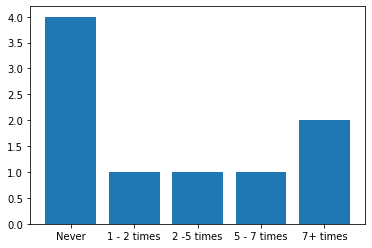

In [14]:
fig1, ax1 = plt.subplots()
time_frame = ['Never', '1 - 2 times', '2 -5 times', '5 - 7 times', '7+ times']
ax1.bar(time_frame,Gamecount)
plt.show()

In [15]:
t = df.iloc[0,SSQs[0]:SSQs[0]+9]


Not at all


In [16]:
def feelingToNumber(vals):
    ret = []
    for val in vals:
        if val == 'Not at all':
            ret.append(0)
        elif val == 'Slightly':
            ret.append(1)
        elif val == 'Moderately':
            ret.append(2)
        elif val == 'Very':
            ret.append(3)
        else:
            print('Wrong Value')
    return ret[0] if len(ret) == 1 else ret

In [17]:
def oculDisSplit(vals):
    """Input: df of one VRSSQ
    
    Return: Two lists with Oculomotor and Disorientation results"""
    ocul = []
    dis = []
    for i in range(len(SYMPTOMS)):
        if SYMPTOMS[i] in oculSymptoms:
            ocul.append(vals[i])
        elif SYMPTOMS[i] in disSymptoms:
            dis.append(vals[i])
    return ocul, dis

In [18]:
def calcOculScore(vals):
    score = 0
    for val in vals:
        score += feelingToNumber([val])
    score = (score/12)*100
    return score

In [19]:
def calcDisScore(vals):
    score = 0
    for val in vals:
        score += feelingToNumber([val])
    score = (score/15)*100
    return score

In [20]:
def calcTotalScore(o, d):
    return (o+d)/2

In [21]:
def calcVRSQ(result):
    ocul, dis = oculDisSplit(result)
    oculScore = calcOculScore(ocul)
    disScore = calcDisScore(dis)
    totalScore = calcTotalScore(oculScore, disScore)
    return oculScore, disScore, totalScore

In [22]:
test = df.iloc[1,SSQs[0]:SSQs[0]+9]
print(test)
o, d, t = calcVRSQ(test)
print("Oculomotor Score: {}\nDisorientation Score: {}\nTotal Score: {}".format(o, d, t))

General Discomfort           Slightly
Fatigue                    Moderately
Headache                   Not at all
Eyestrain                    Slightly
Difficulty Focusing          Slightly
Blurred Vision               Slightly
Dizziness (eyes closed)      Slightly
Vertigo                      Slightly
Fullness of Head             Slightly
Name: 1, dtype: object
Oculomotor Score: 41.66666666666667
Disorientation Score: 20.0
Total Score: 30.833333333333336


In [23]:
for p in range(participantNum):
    participant = df.iloc[p,SSQs[0]:SSQs[0]+9]
    participant_val = feelingToNumber(participant)
    o, d, t = calcVRSQ(participant)
    print("Participant {}:\nOculomotor Score: {}\nDisorientation Score: {}\nTotal Score: {}\n".format(p, o, d, t))

Participant 0:
Oculomotor Score: 16.666666666666664
Disorientation Score: 0.0
Total Score: 8.333333333333332

Participant 1:
Oculomotor Score: 41.66666666666667
Disorientation Score: 20.0
Total Score: 30.833333333333336

Participant 2:
Oculomotor Score: 25.0
Disorientation Score: 13.333333333333334
Total Score: 19.166666666666668

Participant 3:
Oculomotor Score: 16.666666666666664
Disorientation Score: 0.0
Total Score: 8.333333333333332

Participant 4:
Oculomotor Score: 16.666666666666664
Disorientation Score: 0.0
Total Score: 8.333333333333332

Participant 5:
Oculomotor Score: 25.0
Disorientation Score: 6.666666666666667
Total Score: 15.833333333333334

Participant 6:
Oculomotor Score: 0.0
Disorientation Score: 0.0
Total Score: 0.0

Participant 7:
Oculomotor Score: 0.0
Disorientation Score: 0.0
Total Score: 0.0

Participant 8:
Oculomotor Score: 0.0
Disorientation Score: 0.0
Total Score: 0.0



In [25]:
pre_experiment_vrsq_average = []
pre_experiment_vrsq_symptoms = np.zeros((participantNum, 9))
for p in range(participantNum):
    participant = df.iloc[p,SSQs[0]:SSQs[0]+9]
    participant_val = feelingToNumber(participant)
    pre_experiment_vrsq_symptoms[p,:] = participant_val
    o, d, t = calcVRSQ(participant)
    pre_experiment_vrsq_average.append([o,d,t])
pre_experiment_vrsq_average = np.array(pre_experiment_vrsq_average)
average_o = np.mean(pre_experiment_vrsq_average[:,0])
average_d = np.mean(pre_experiment_vrsq_average[:,1])
average_t = np.mean(pre_experiment_vrsq_average[:,2])
print("Average Oculomotor Score: {}\nAvereAverageage Disorientation Score: {}\nAverage Total Score: {}\n".format(average_o, average_d, average_t))

Average Oculomotor Score: 15.74074074074074
AvereAverageage Disorientation Score: 4.444444444444445
Average Total Score: 10.092592592592593



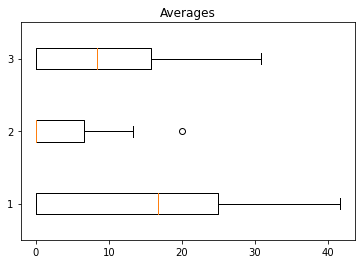

In [27]:
fig1, ax1 = plt.subplots()
ax1.set_title('Averages')
ax1.boxplot(pre_experiment_vrsq_average, vert=False)
plt.show()

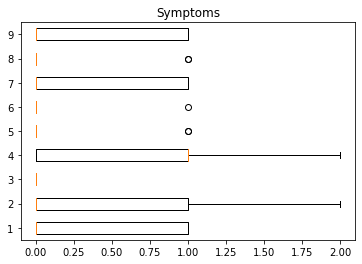

In [28]:
fig1, ax1 = plt.subplots()
ax1.set_title('Symptoms')
ax1.boxplot(pre_experiment_vrsq_symptoms, vert=False)
plt.show()

In [29]:
# TODO count the number of times each user used snap rotation
# TODO count the number of times each user used sanp rotation in different types of mazes
# TODO count the number of times each user used snap rotation with each locomotion method

# Get the data from maze log
angles = np.zeros((9,4))
p = 0
data = maze_data[p]
#print(data['telemetryRecords'])
'''
SR - Snap Rotation
MA - Maze type
MT - Movement type
PS - Angle

To find angle:
    first find the ps event
    Followed by MT to find the movement type

'''
# Find the angle locomotion method pair
def getAngleLocomotionPair(data):
    angleFound = False
    tempAngle = 0
    pairs = []
    for i in data['eventRecords']:
        if i['eventIdentifier'] == "PS":
            angleFound = True
            tempAngle = i['eventDescription']
        if i['eventIdentifier'] == "MT" and angleFound:
            angleFound = False
            pairs.append((tempAngle, i['eventDescription']))

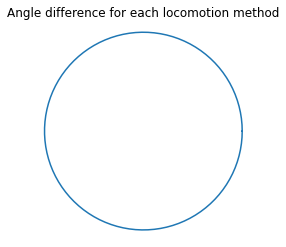

In [30]:
# TODO create circle graph

# Plot the circle
theta = np.linspace(0, 2*np.pi, 100)

radius = 1

a = radius*np.cos(theta)
b = radius*np.sin(theta)

figure, axes = plt.subplots(1)

axes.plot(a, b)
axes.set_aspect(1)

plt.title('Angle difference for each locomotion method')
plt.axis('off')
plt.show()

In [77]:
temp = []
for i in range(number_of_questions):
    test = df.iloc[:,ENDQNA+4*i:ENDQNA+4*i+4]
    temp.append(test)
temp = np.array(temp)
temp = temp.reshape(36,4)
for i in range(36):
    for j in range(4):
        if temp[i,j] == "1st":
            temp[i,j] = 1
        elif temp[i,j] == "2nd":
            temp[i,j] = 2
        elif temp[i,j] == "3rd":
            temp[i,j] = 3
        elif temp[i,j] == "4th":
            temp[i,j] = 4
stat, p = friedmanchisquare(temp[:,0], temp[:,1], temp[:,2], temp[:,3])
print(stat)
print(p)

12.34261838440106
0.006297076878939269


In [90]:
r = sp.posthoc_nemenyi_friedman(np.array(temp, dtype='i'))
print(r)

          0         1         2         3
0  1.000000  0.772753  0.202308  0.490308
1  0.772753  1.000000  0.695892  0.091664
2  0.202308  0.695892  1.000000  0.004076
3  0.490308  0.091664  0.004076  1.000000


,0,1,2
0,1.000000,0.145624,0.813237
1,0.145624,1.000000,0.037622
2,0.813237,0.037622,1.000000
